In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import datetime
from numba import njit


pd.set_option('display.max_columns', None)


In [2]:
dates = []

for d in range(1, 366):
    day = datetime.datetime(2010, 1, 1) + datetime.timedelta(d - 1)
    dates.append(day.strftime("%Y-%m-%d"))



In [3]:
dates

['2010-01-01',
 '2010-01-02',
 '2010-01-03',
 '2010-01-04',
 '2010-01-05',
 '2010-01-06',
 '2010-01-07',
 '2010-01-08',
 '2010-01-09',
 '2010-01-10',
 '2010-01-11',
 '2010-01-12',
 '2010-01-13',
 '2010-01-14',
 '2010-01-15',
 '2010-01-16',
 '2010-01-17',
 '2010-01-18',
 '2010-01-19',
 '2010-01-20',
 '2010-01-21',
 '2010-01-22',
 '2010-01-23',
 '2010-01-24',
 '2010-01-25',
 '2010-01-26',
 '2010-01-27',
 '2010-01-28',
 '2010-01-29',
 '2010-01-30',
 '2010-01-31',
 '2010-02-01',
 '2010-02-02',
 '2010-02-03',
 '2010-02-04',
 '2010-02-05',
 '2010-02-06',
 '2010-02-07',
 '2010-02-08',
 '2010-02-09',
 '2010-02-10',
 '2010-02-11',
 '2010-02-12',
 '2010-02-13',
 '2010-02-14',
 '2010-02-15',
 '2010-02-16',
 '2010-02-17',
 '2010-02-18',
 '2010-02-19',
 '2010-02-20',
 '2010-02-21',
 '2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-02-27',
 '2010-02-28',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-06',
 '2010-03-07',
 '2010-03-

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/BadgerX Data/MODIS Fire Data/"


fire20192 = pd.read_csv("2010.csv")


Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1DebF_UxJ8HVlNU3YtYGSpTlwMstdY3sb/BadgerX Data/MODIS Fire Data


In [5]:
fire20192.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
fire20192

,latitude,longitude,brightness,acq_date,acq_time,confidence,bright_t31,frp
0,35.1330,-119.8025,303.7,2010-01-12,1851,49,292.4,3.3
1,35.1314,-119.7917,333.9,2010-01-12,1851,89,296.0,31.9
2,35.1226,-119.7936,306.5,2010-01-12,1851,62,293.8,5.3
3,36.2367,-120.2348,304.1,2010-01-12,1851,48,288.1,5.3
4,36.2352,-120.2237,306.0,2010-01-12,1851,56,287.4,6.6
...,...,...,...,...,...,...,...,...
1673,33.9426,-117.6165,303.2,2010-12-13,605,54,282.6,9.2
1674,34.9114,-119.5201,321.0,2010-12-14,1851,81,292.4,16.9
1675,33.6492,-117.3988,320.1,2010-12-14,1851,79,291.9,20.0
1676,33.5936,-116.0630,310.8,2010-12-14,1851,57,294.5,9.9


In [7]:
def regrid_aqs(df, day,feature):
    measurements = df[df["acq_date"].astype('string') == str(day)]
    grid = [[[] for i in range(120)] for j in range(120)]
    for i in range(measurements.shape[0]):
        latidx = int((42 - measurements.iloc[i]["latitude"]) / 0.05)
        lonidx = int((measurements.iloc[i]["longitude"] + 124.5) / 0.05)
        if 119 >= latidx >= 0 and 0 <= lonidx <= 119:
          grid[latidx][lonidx].append(measurements.iloc[i][feature])

    final_grid = np.zeros((120, 120))

    for i in range(120):
        for j in range(120):
            if len(grid[i][j]) != 0:
                final_grid[i, j] = sum(grid[i][j]) / len(grid[i][j])
    return final_grid.reshape(120*120)

In [8]:
l = []
l2 = []
l3 = []

for d in dates[:]:
    l.append(regrid_aqs(fire20192, d, "confidence"))
    l2.append(regrid_aqs(fire20192, d, "frp"))
    l3.append(regrid_aqs(fire20192, d, "brightness"))  

l = np.array(l).reshape(365*120*120)  
l2 = np.array(l2).reshape(365*120*120) 
l3 = np.array(l3).reshape(365*120*120)
print(len(l)/(120*120))
print(len(l2)/(120*120))
print(len(l3)/(120*120))

365.0
365.0
365.0


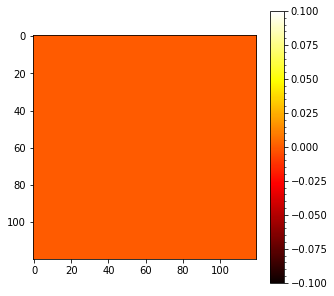

In [14]:
l2star = l2.reshape((365,120*120))
fig, (ax1) = plt.subplots(figsize=(5,5), ncols=1)
lolol = ax1.imshow(np.array(l2star[363][0:120*120]).reshape(120, 120), cmap='hot', interpolation='none')
cbar = fig.colorbar(lolol, ax=ax1)
cbar.minorticks_on()
plt.show()
l = np.array(l).reshape((365,120*120))  
l2 = np.array(l2).reshape((365,120*120)) 
l3 = np.array(l3).reshape((365,120*120))

In [15]:
import csv

with open("/content/drive/My Drive/BadgerX Data/UntransformedCSV/2010confidence.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(l)

with open("/content/drive/My Drive/BadgerX Data/UntransformedCSV/2010frp.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(l2)   

with open("/content/drive/My Drive/BadgerX Data/UntransformedCSV/2010brightness.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(l3) 